In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
ls S_magnitude_models_evid_C1.0_e0.1_9features/

B206_NGB_summary_df.csv       YHL.SVR.joblib
B206.SVR.joblib               YHL_test_summary_df.csv
B206_test_summary_df.csv      YHL.train.scaler.joblib
B206.train.scaler.joblib      YHL_train_summary_df.csv
B206_train_summary_df.csv     YMC_NGB_summary_df.csv
B207_NGB_summary_df.csv       YMC.SVR.joblib
B207.SVR.joblib               YMC_test_summary_df.csv
B207_test_summary_df.csv      YMC.train.scaler.joblib
B207.train.scaler.joblib      YMC_train_summary_df.csv
B207_train_summary_df.csv     YML_NGB_summary_df.csv
combined_ngb_summary_df.csv   YML.SVR.joblib
combined_test_summary_df.csv  YML_test_summary_df.csv
FLWY.SVR.joblib               YML.train.scaler.joblib
FLWY_test_summary_df.csv      YML_train_summary_df.csv
FLWY.train.scaler.joblib      YMR_NGB_summary_df.csv
FLWY_train_summary_df.csv     YMR.SVR.joblib
LKWY.SVR.joblib               YMR_test_summary_df.csv
LKWY_test_summary_df.csv      YMR.train.scaler.joblib
LKWY.train.scaler.joblib      YMR_train_summary_df.csv
LKWY_trai

In [3]:
fdir = 'S_magnitude_models_evid_C1.0_e0.1_9features'
stat_summary_df = pd.read_csv(f'{fdir}/stat_results_df.csv')
stat_summary_df

,Unnamed: 0,index,test_mse,test_r2,train_mse,train_r2,ngb_mse,ngb_r2,train_count,test_count,ngb_count
0,0,YNR,0.028911,0.905156,0.018311,0.936318,0.094501,0.729102,1695.0,429.0,114.0
1,1,YMR,0.027957,0.894516,0.020993,0.921660,0.053393,0.826672,1145.0,284.0,167.0
2,2,YMC,0.034854,0.787537,0.029182,0.803066,0.059290,0.629174,1124.0,295.0,44.0
3,3,YHB,0.028979,0.909557,0.015770,0.954204,0.040537,0.860290,708.0,178.0,283.0
4,4,YHH,0.034514,0.862096,0.023232,0.893983,0.089677,0.604963,715.0,187.0,195.0
5,5,YFT,0.034309,0.868120,0.014234,0.946686,0.012097,0.941984,713.0,205.0,11.0
6,6,YUF,0.052330,0.755862,0.038363,0.842348,0.055620,0.743680,582.0,158.0,175.0
7,7,YHL,0.030884,0.910204,0.020858,0.941908,0.175536,0.794321,459.0,117.0,6.0
8,8,YML,0.053527,0.821850,0.024528,0.921087,0.067137,0.488318,421.0,83.0,24.0
9,9,YTP,0.021022,0.879795,0.019423,0.891581,NaN,NaN,388.0,88.0,0.0


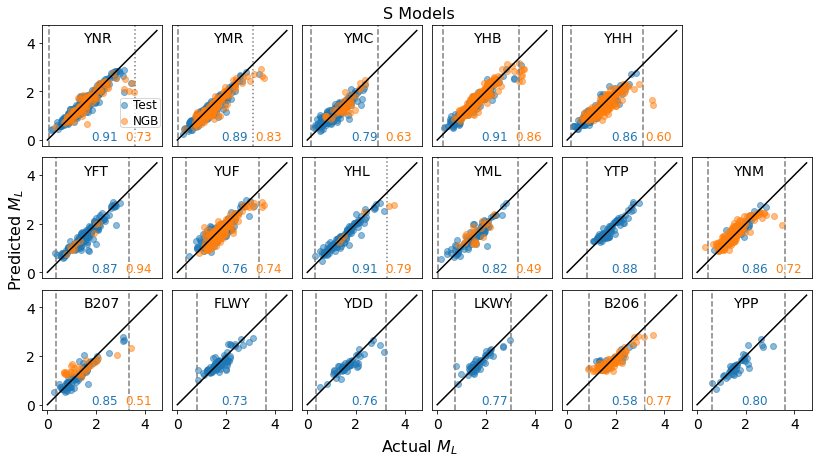

In [4]:
n_stats = len(stat_summary_df)
n_cols = 6
n_rows = int(np.ceil((n_stats)/n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(11, 6.1), constrained_layout=True)
axes = axes.flatten()

stat_list = stat_summary_df['index'].tolist()
stat_list.insert(n_cols-1, "null")
i = 0
for cnt, station in enumerate(stat_list):
    if cnt == n_cols-1:
        continue
    # Read in data
    test_df = pd.read_csv(f"{fdir}/{station}_test_summary_df.csv")
    train_df = pd.read_csv(f"{fdir}/{station}_train_summary_df.csv")
    # Some stations do not have NGB examples
    ngb_df=None
    try:
        ngb_df = pd.read_csv(f"{fdir}/{station}_NGB_summary_df.csv")
    except:
        ndb_df = None

    # Ticks
    ax = axes[cnt]
    if cnt < n_stats-n_cols+1:
        ax.set_xticks([])
    else:
        ax.set_xticks([0, 2, 4])
    if (cnt % n_cols != 0):
        ax.set_yticks([])

    ax.scatter(test_df['magnitude'], test_df['predicted_magnitude'], label="Test", color="C0", alpha=0.5)
    if ngb_df is not None:
        ax.scatter(ngb_df['magnitude'], ngb_df['predicted_magnitude'], label="NGB", color="C1", alpha=0.5)
    ax.axvline(np.min(train_df.magnitude), color="gray", linestyle="--")
    #print(train_df.magnitude.max())
    max_ls = "--"
    if len(train_df[train_df.magnitude>4.3]) > 0:
        max_ls = ":"    
    ax.axvline(np.max(train_df[train_df.magnitude < 4.36].magnitude), color="gray", linestyle=max_ls)

    ax.plot(np.arange(0, 5, 0.5), np.arange(0, 5, 0.5), color="k")
    ax.text(1.5, 4.0, station, fontsize=14) #, bbox={"facecolor":"white", "alpha":0.5}

    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=8)

#     ax.text(2.9, 0.2, 
#         f"Test R$^2$={stat_summary_df.iloc[cnt]['test_r2']:1.2f}\nNGB R$^2$={stat_summary_df.iloc[cnt]['ngb_r2']:1.2f}",
#            fontsize=11,
#            bbox=dict(facecolor='white', alpha=0.5))

    ax.text(1.8, 0.01, f"{stat_summary_df.iloc[i]['test_r2']:1.2f}", color="C0", fontsize=12)
    if ngb_df is not None:
        ax.text(3.2, 0.01, f"{stat_summary_df.iloc[i]['ngb_r2']:1.2f}", color="C1", fontsize=12,
               bbox=dict(facecolor='white', alpha=0.5, edgecolor='white', pad=0.1))

    ax.set_aspect('equal', adjustable='box')
    i += 1
    
fig.supxlabel(r"Actual $M_L$", fontsize=16)
fig.supylabel(r"Predicted $M_L$", fontsize=16, x=-0.02)
#fig.suptitle(f"C={C}, $\epsilon$={epsilon}", y=0.91, fontsize=12)
fig.suptitle("S Models", fontsize=16, y=1.03)
axes[0].legend(loc=(0.65, 0.15), fontsize=12, handletextpad=0.5, borderpad=0.05, 
           borderaxespad=0.05, handlelength=0.5, labelspacing=0.2)
axes.flatten()[n_cols-1].axis('off')
#fig.tight_layout()
plt.savefig('../proposal_figs/S_station_mag_scatter_equal.png', dpi=300, bbox_inches='tight')

In [9]:
stat_summary_df[stat_summary_df['index'].isin(["YNR", "YHH", "YMC"])]

,Unnamed: 0,index,test_mse,test_r2,train_mse,train_r2,ngb_mse,ngb_r2,train_count,test_count,ngb_count
0,0,YNR,0.028911,0.905156,0.018311,0.936318,0.094501,0.729102,1695.0,429.0,114.0
2,2,YMC,0.034854,0.787537,0.029182,0.803066,0.059290,0.629174,1124.0,295.0,44.0
4,4,YHH,0.034514,0.862096,0.023232,0.893983,0.089677,0.604963,715.0,187.0,195.0


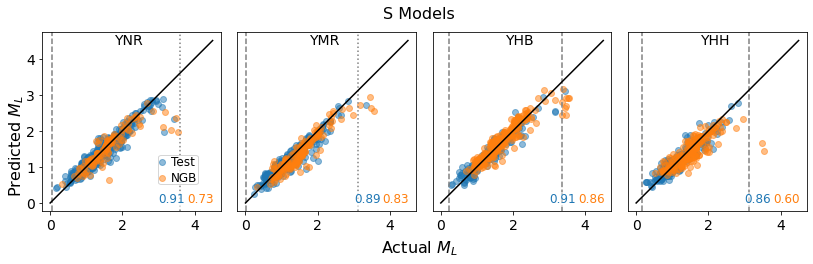

In [53]:
selected_df = stat_summary_df[stat_summary_df['index'].isin(["YNR", "YMR", "YHB", "YHH"])]
n_stats = len(selected_df)
n_cols = n_stats
n_rows = 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(11, 3.2), constrained_layout=True)
axes = axes.flatten()
stat_list = selected_df['index'].tolist()
i = 0
for cnt, station in enumerate(stat_list):
    # Read in data
    test_df = pd.read_csv(f"{fdir}/{station}_test_summary_df.csv")
    train_df = pd.read_csv(f"{fdir}/{station}_train_summary_df.csv")
    # Some stations do not have NGB examples
    ngb_df=None
    try:
        ngb_df = pd.read_csv(f"{fdir}/{station}_NGB_summary_df.csv")
    except:
        ndb_df = None

    # Ticks
    ax = axes[cnt]

    if (cnt % n_cols != 0):
        ax.set_yticks([])

    ax.scatter(test_df['magnitude'], test_df['predicted_magnitude'], label="Test", color="C0", alpha=0.5)
    if ngb_df is not None:
        ax.scatter(ngb_df['magnitude'], ngb_df['predicted_magnitude'], label="NGB", color="C1", alpha=0.5)
    ax.axvline(np.min(train_df.magnitude), color="gray", linestyle="--")
    #print(train_df.magnitude.max())
    max_ls = "--"
    if len(train_df[train_df.magnitude>4.3]) > 0:
        max_ls = ":"    
    ax.axvline(np.max(train_df[train_df.magnitude < 4.36].magnitude), color="gray", linestyle=max_ls)

    ax.plot(np.arange(0, 5, 0.5), np.arange(0, 5, 0.5), color="k")
    ax.text(1.8, 4.4, station, fontsize=14) #, bbox={"facecolor":"white", "alpha":0.5}

    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=8)

#     ax.text(2.9, 0.2, 
#         f"Test R$^2$={stat_summary_df.iloc[cnt]['test_r2']:1.2f}\nNGB R$^2$={stat_summary_df.iloc[cnt]['ngb_r2']:1.2f}",
#            fontsize=11,
#            bbox=dict(facecolor='white', alpha=0.5))

    ax.text(3.0, 0.01, f"{selected_df.iloc[i]['test_r2']:1.2f}", color="C0", fontsize=12,
           bbox=dict(facecolor='white', alpha=0.5, edgecolor='white', pad=0.1))
    if ngb_df is not None:
        ax.text(3.8, 0.01, f"{selected_df.iloc[i]['ngb_r2']:1.2f}", color="C1", fontsize=12,
               bbox=dict(facecolor='white', alpha=0.5, edgecolor='white', pad=0.1))

    ax.set_aspect('equal', adjustable='box')
    i += 1
    
fig.supxlabel(r"Actual $M_L$", fontsize=16)
fig.supylabel(r"Predicted $M_L$", fontsize=16, x=-0.02)
#fig.suptitle(f"C={C}, $\epsilon$={epsilon}", y=0.91, fontsize=12)
fig.suptitle("S Models", fontsize=16, y=1.1)
axes[0].legend(loc=(0.65, 0.15), fontsize=12, handletextpad=0.5, borderpad=0.05, 
           borderaxespad=0.05, handlelength=0.5, labelspacing=0.2)
#fig.tight_layout()
plt.savefig('../quals_figs/S_station_mag_scatter_equal.png', dpi=300, bbox_inches='tight')

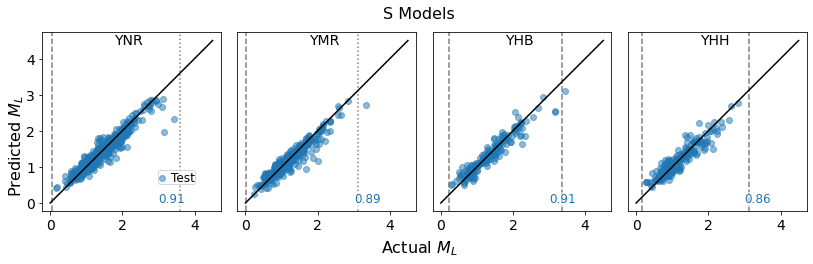

In [56]:
selected_df = stat_summary_df[stat_summary_df['index'].isin(["YNR", "YMR", "YHB", "YHH"])]
n_stats = len(selected_df)
n_cols = n_stats
n_rows = 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(11, 3.2), constrained_layout=True)
axes = axes.flatten()
stat_list = selected_df['index'].tolist()
i = 0
for cnt, station in enumerate(stat_list):
    # Read in data
    test_df = pd.read_csv(f"{fdir}/{station}_test_summary_df.csv")
    train_df = pd.read_csv(f"{fdir}/{station}_train_summary_df.csv")

    # Ticks
    ax = axes[cnt]

    if (cnt % n_cols != 0):
        ax.set_yticks([])

    ax.scatter(test_df['magnitude'], test_df['predicted_magnitude'], label="Test", color="C0", alpha=0.5)
   
    ax.axvline(np.min(train_df.magnitude), color="gray", linestyle="--")
    #print(train_df.magnitude.max())
    max_ls = "--"
    if len(train_df[train_df.magnitude>4.3]) > 0:
        max_ls = ":"    
    ax.axvline(np.max(train_df[train_df.magnitude < 4.36].magnitude), color="gray", linestyle=max_ls)

    ax.plot(np.arange(0, 5, 0.5), np.arange(0, 5, 0.5), color="k")
    ax.text(1.8, 4.4, station, fontsize=14) #, bbox={"facecolor":"white", "alpha":0.5}

    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=8)

#     ax.text(2.9, 0.2, 
#         f"Test R$^2$={stat_summary_df.iloc[cnt]['test_r2']:1.2f}\nNGB R$^2$={stat_summary_df.iloc[cnt]['ngb_r2']:1.2f}",
#            fontsize=11,
#            bbox=dict(facecolor='white', alpha=0.5))

    ax.text(3.0, 0.01, f"{selected_df.iloc[i]['test_r2']:1.2f}", color="C0", fontsize=12,
           bbox=dict(facecolor='white', alpha=0.5, edgecolor='white', pad=0.1))

    ax.set_aspect('equal', adjustable='box')
    i += 1
    
fig.supxlabel(r"Actual $M_L$", fontsize=16)
fig.supylabel(r"Predicted $M_L$", fontsize=16, x=-0.02)
#fig.suptitle(f"C={C}, $\epsilon$={epsilon}", y=0.91, fontsize=12)
fig.suptitle("S Models", fontsize=16, y=1.1)
axes[0].legend(loc=(0.65, 0.15), fontsize=12, handletextpad=0.5, borderpad=0.05, 
           borderaxespad=0.05, handlelength=0.5, labelspacing=0.2)
#fig.tight_layout()
plt.savefig('../quals_figs/S_station_mag_scatter_equal_nongb.png', dpi=300, bbox_inches='tight')

In [39]:
stat_list = stat_summary_df['index'].tolist()

In [55]:
stat_list.insert(5, "null")

In [56]:
stat_list

['YNR',
 'YMR',
 'YMC',
 'YHB',
 'YHH',
 'null',
 'YFT',
 'YUF',
 'YHL',
 'YML',
 'YTP',
 'YNM',
 'B207',
 'FLWY',
 'YDD',
 'LKWY',
 'B206',
 'YPP']

In [81]:
ynr_test_df = pd.read_csv(f'S_magnitude_models_evid_C1.0_e0.1_9features/YNR_test_summary_df.csv')

Text(0.5, 1.05, '$M_L$ using S-arrival features')

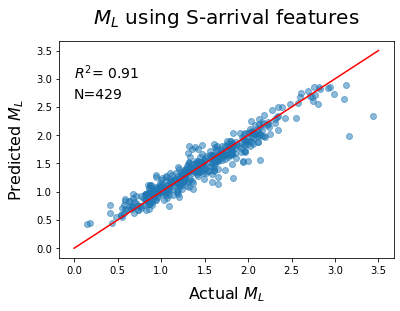

In [82]:
plt.scatter(ynr_test_df['magnitude'], ynr_test_df['predicted_magnitude'], alpha=0.5)
plt.plot(np.arange(0, 4.0, 0.5), np.arange(0, 4.0, 0.5), color="red")
plt.xlabel(r"Actual $M_L$", fontsize=16, labelpad=10)
plt.ylabel(r"Predicted $M_L$", fontsize=16, labelpad=10)
plt.text(0, 3.0, f'{r"$R^2$="} {stat_summary_df[stat_summary_df["index"]=="YNR"].test_r2.values[0]:.02f}', fontsize=14)
plt.text(0, 2.65, f'N={ynr_test_df.shape[0]}', fontsize=14)
plt.title(r"$M_L$ using S-arrival features", fontsize=20, y=1.05)

In [83]:
ynr_test_df

,evid,amp_ratio_01.0,amp_02.0,signal_variance,noise_variance,noise_max_amplitude,signal_max_amplitude,source_receiver_distance_logkm,source_depth_km,receiver_back_azimuth,magnitude,predicted_magnitude
0,60001557,0.429735,1.687864,1.386518,1.533337,1.359454,1.248246,1.597219,0.617167,-0.681962,3.10,2.645668
1,60011162,0.369201,1.471091,1.961799,1.608501,1.817941,2.038781,-1.289033,-0.890544,-3.181907,1.31,1.693577
2,60013972,-1.423617,0.134864,-0.133025,-0.325539,-0.403430,-0.022939,0.843583,0.169825,0.400116,1.58,1.655697
3,60014782,-1.645737,-1.007873,-1.355141,-1.022980,-1.007486,-1.392056,0.604651,-0.091125,0.203105,0.95,0.927926
4,60022577,0.837594,0.344419,0.068898,-0.071883,-0.096850,-0.110208,0.509514,0.654446,-0.369307,1.47,1.672739
...,...,...,...,...,...,...,...,...,...,...,...,...
424,60461507,-0.085811,1.271523,1.681547,1.771142,2.061906,1.768322,-2.602530,-1.383449,-3.783662,1.61,1.611097
425,60461947,-0.470049,0.960898,1.539956,1.846277,2.159319,1.581070,-8.188394,-1.288182,-2.520086,1.32,1.806917
426,60462452,-2.056245,-0.593391,-0.408572,-0.423677,-0.378213,-0.290605,-0.722129,0.086983,0.957889,0.65,0.755500
427,60462887,-2.952298,-1.129617,-0.679326,-0.918465,-0.920505,-0.507634,0.893067,2.075174,0.326319,0.94,1.293004


In [75]:
stat_summary_df[stat_summary_df["index"]=="YNR"].test_r2.values[0]

0.9051564186667436

In [78]:
fdir

'S_magnitude_models_evid_C1.0_e0.1_9features'